### With Forest-Type (UCI dataset)

In [4]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_forest

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

   b1  b2  b3   b4  b5   b6   b7  b8  b9  pred_minus_obs_H_b1  ...  \
0  67  51  68  115  69  111  136  31  67                47.70  ...   
1  67  28  51   99  50   97   82  26  59                47.93  ...   
2  63  26  50   95  49   91   81  26  57                53.09  ...   
3  63  42  63   97  66  108  111  28  59                52.41  ...   
4  46  27  50   83  51   90   76  26  56                68.54  ...   

   pred_minus_obs_H_b9  pred_minus_obs_S_b1  pred_minus_obs_S_b2  \
0                -9.17               -18.27                -1.80   
1                -2.25               -20.13                -2.11   
2                -0.44               -17.64                -1.81   
3                -2.34               -20.20                -1.89   
4                 1.25               -18.62                -2.17   

   pred_minus_obs_S_b3  pred_minus_obs_S_b4  pred_minus_obs_S_b5  \
0                -6.32               -20.88                -1.63   
1                -6.35            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


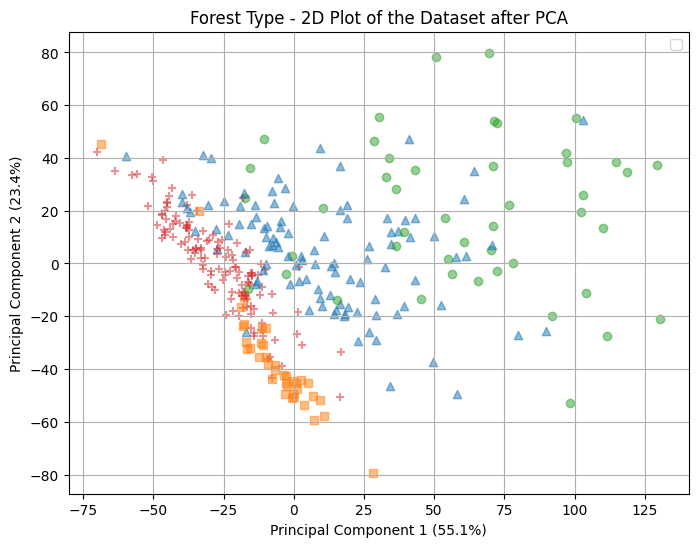

Instances: 325; Features: 27; Clusters: class    4
dtype: int64


In [5]:
### Forest Type dataset
# fetch dataset 
forest_type = load_forest()

X = forest_type.iloc[:, 1:]
y = pd.DataFrame(forest_type.iloc[:, 0])
c = 4

markers = ['^', 's', 'o', '+']
plotting(X, y, "Forest Type", markers=markers)
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [6]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [25.46627880401943, 25.466511281422694, 25.466617666009785, 25.466620021206282, 25.466620021206282, 25.466620021206282, 25.46662444492372, 25.466634090139475, 25.466759685088043, 25.466959329606304]
ARI values: [0.16449430855809735, 0.17958613893573622, 0.17958613893573622, 0.1799612081814437, 0.1799612081814437, 0.1799612081814437, 0.1799612081814437, 0.18231717142604373, 0.18718237517961828, 0.20204015884048696]
NS values: [1.727207909725472, 1.759977091673816, 1.7271954713199955, 1.7183948637919488, 1.7584120610776393, 1.7587306421118256, 1.7568292359510689, 1.7601309788411512, 1.7168642599018158, 1.862069831602911]
NMI values: [0.2618211513927454, 0.2766172852161723, 0.2766172852161723, 0.27707154198048795, 0.2770715419804879, 0.2770715419804879, 0.2770715419804879, 0.2788518715638382, 0.2777297816420265, 0.2938129323144347]


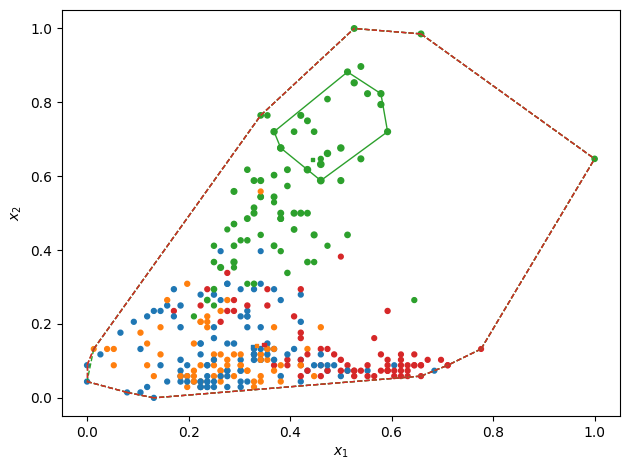

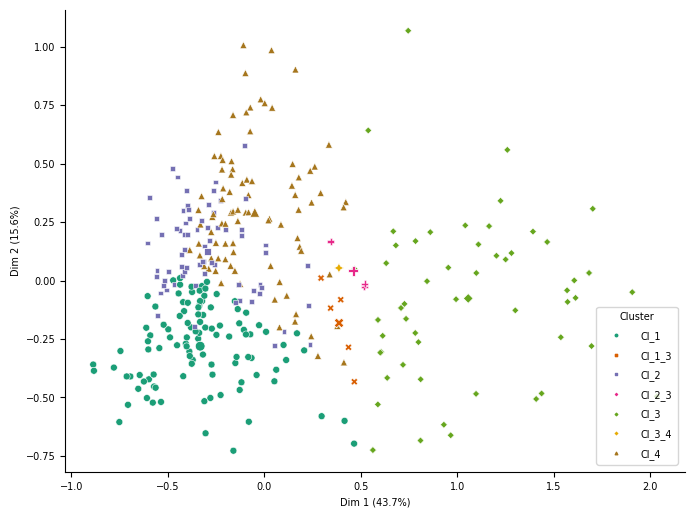

In [7]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [40]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.019666923650952815, 0.019670957539909648, 0.019673646717848388, 0.019676676550767894, 0.019678601557077596, 0.019685651547088276, 0.01969806516146484, 0.019698065161465765, 0.01971539868872136, 0.019719126247879155]
ARI values: [0.14195067543235984, 0.1420156784402141, 0.19096279495428425, 0.12819313764766563, 0.1284777752480437, 0.12488772926159944, 0.12774007456628972, 0.12774007456628972, 0.13768324697769885, 0.13171838358952642]
NS values: [1.3759022098871472, 1.3662296582447233, 1.3645541519129614, 1.2621371160292587, 1.3344945786476154, 1.3808513437277001, 1.2659795662862294, 1.383262066632962, 1.285360716804372, 1.2785678712496913]
NMI values: [0.223301095266376, 0.22492737576762128, 0.24604191025553304, 0.22116885993908983, 0.2213921343760368, 0.21876632884373542, 0.2198983447743928, 0.2198983447743928, 0.2221497518026511, 0.21956266594004295]


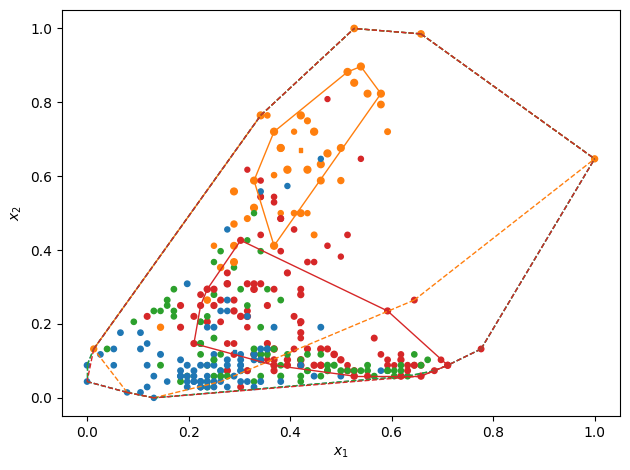

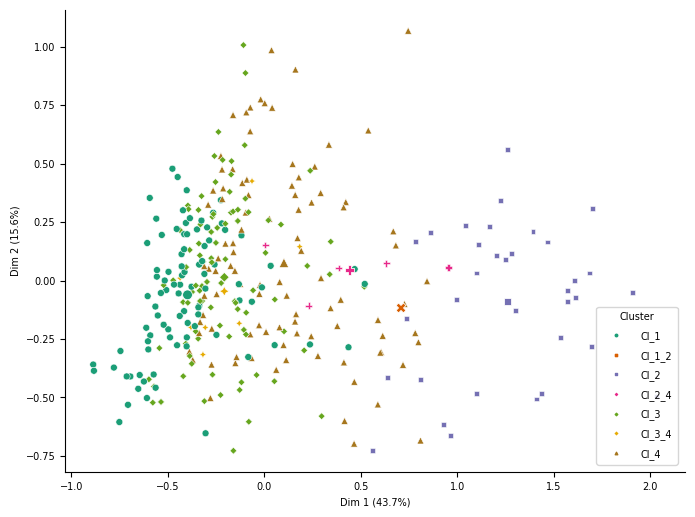

In [41]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [12]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.035753408752701124, 0.03575353819136409, 0.03575354440022567, 0.035753670379840556, 0.035753690436982524, 0.035753718197788865, 0.035753746730208605, 0.035753763981394474, 0.03575381514679325, 0.035754084484561174]
ARI values: [0.15440345078587409, 0.15676255261151378, 0.1573781762401839, 0.15676255261151378, 0.15923237714764624, 0.15923237714764624, 0.15923237714764624, 0.1573781762401839, 0.15923237714764624, 0.1598477254601324]
NMI values: [0.24032491431975775, 0.24195634411628592, 0.24658343248591663, 0.24195634411628592, 0.24368008285633702, 0.24368008285633708, 0.24368008285633702, 0.24658343248591663, 0.24368008285633702, 0.24830796723611925]


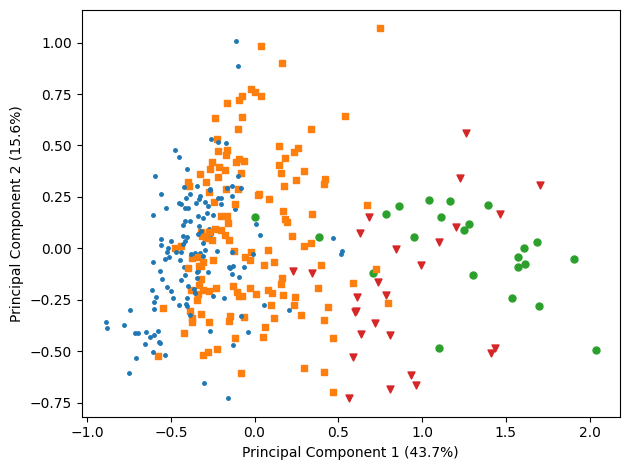

In [13]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [14]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=0.95, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [0.07704556395335599, 0.07705436725868087]
ARI values: [0.17790950823841564, 0.17705861174468204]
NMI values: [0.2741893341028151, 0.2738381402059182]


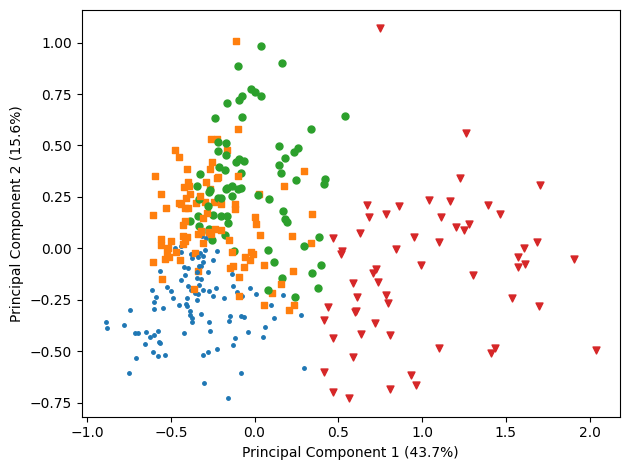

In [15]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [20]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, epsilon=1e-6)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [5.889693553566945, 5.889693567949862, 5.88969357098053, 5.889693609297023, 5.889693657130864, 5.889693774819925, 5.889693777070747, 5.889693777070747, 5.889693816087028, 5.889693956029685]
ARI values: [0.22531715159073287, 0.22764859799757156, 0.22641263581143142, 0.22165020324343823, 0.22531715159073287, 0.22531715159073287, 0.22531715159073287, 0.22531715159073287, 0.22531715159073287, 0.22165020324343823]
NMI values: [0.2652551487525247, 0.26608694396275234, 0.2641636200248273, 0.26471830150178915, 0.26525514875252465, 0.26525514875252465, 0.26525514875252465, 0.26525514875252465, 0.26525514875252465, 0.2647183015017892]


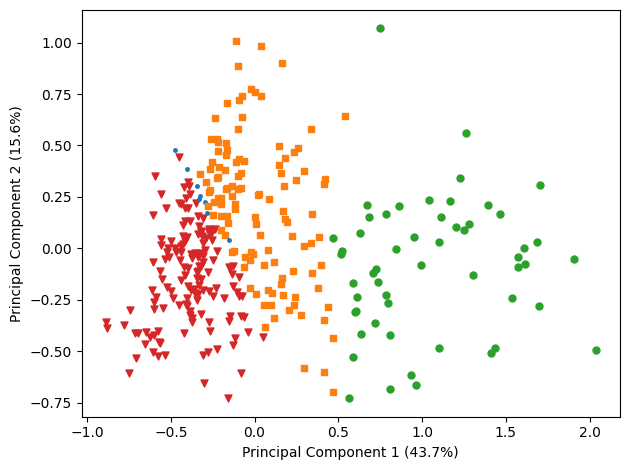

In [21]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [28]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, epsilon=1e-3)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.04936539505857003, 0.0493945675997767, 0.0494084196900432, 0.049410870813892845, 0.049416713787139105, 0.04941787834305289, 0.04941995700630751, 0.049423957400077274, 0.04945940880958063, 0.04946087543909909]
ARI values: [0.1889110575291042, 0.18580452175344997, 0.16927294172952762, 0.17372142391515916, 0.16951096321555933, 0.165999502649917, 0.16494405535410117, 0.1712679480576221, 0.16460179292788232, 0.17909905278815388]
NMI values: [0.26229313688470485, 0.2625280312364222, 0.24384542713099464, 0.25194466398915494, 0.24631268289291994, 0.24365885433085077, 0.24291645439922815, 0.24608367140651663, 0.2554188568354735, 0.2583066314862026]


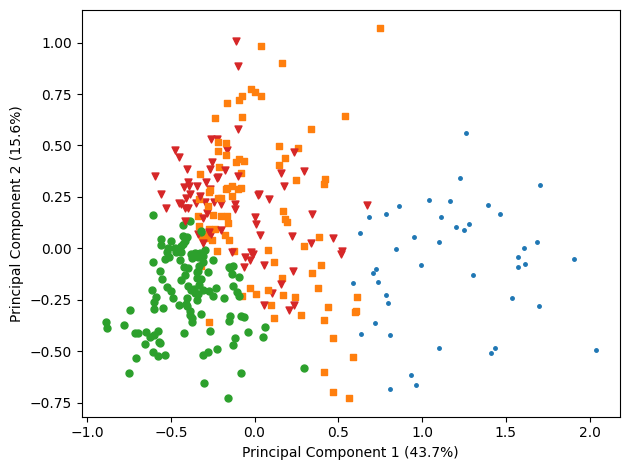

In [29]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [44]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.06804224326253311, 0.06804236299073069, 0.06804386427829526, 0.0680442835056228, 0.06804430888035687, 0.06804434238105733, 0.06804434238105735, 0.06804669623638973, 0.06804728219048425, 0.06804934267681498]
ARI values: [0.11988853652557652, 0.11988853652557652, 0.11988853652557652, 0.12237326096357361, 0.12237326096357361, 0.12237326096357361, 0.12237326096357361, 0.11911826664771494, 0.11911826664771494, 0.12118217185420399]
NMI values: [0.18466680978556196, 0.18466680978556196, 0.18466680978556196, 0.18699486251448166, 0.18699486251448166, 0.18699486251448166, 0.1869948625144817, 0.18383229695052766, 0.18383229695052766, 0.18613265469325804]


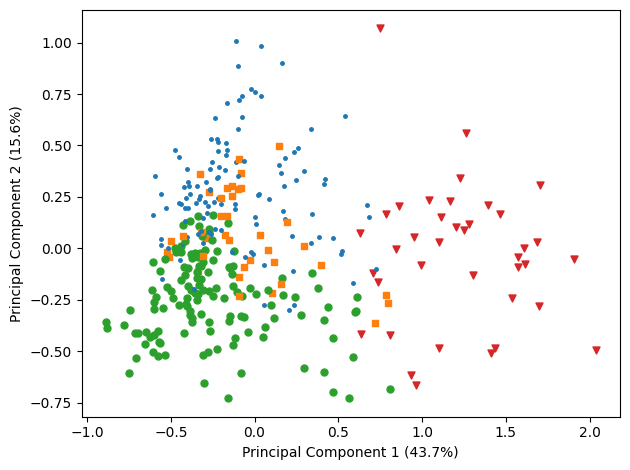

In [45]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [46]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [1.0123940903333897, 1.0123941767323776, 1.0123941767323776, 1.012394176732378, 1.0123942603692304, 1.0123942760374394, 1.0123942760374396, 1.0123944547670072, 1.012394480585992, 1.0123946225981137]
ARI values: [0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247, 0.11798259441975247]
NMI values: [0.18024282003384703, 0.18024282003384703, 0.18024282003384703, 0.180242820033847, 0.18024282003384703, 0.18024282003384703, 0.18024282003384703, 0.18024282003384703, 0.18024282003384703, 0.180242820033847]


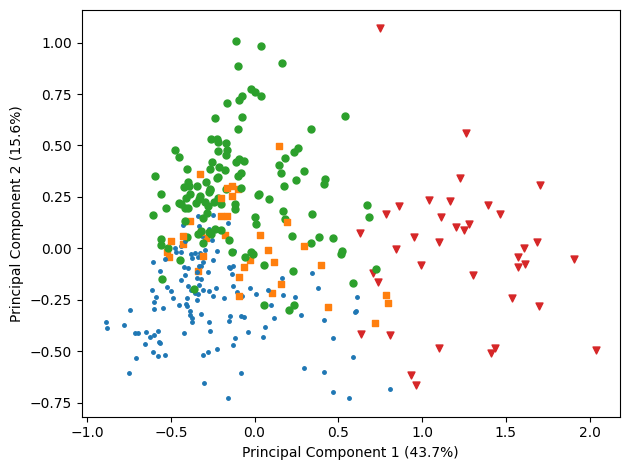

In [47]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)